In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-fake-news-dataset-around-the-syrian-war/FA-KES-Dataset.csv


In [2]:
news=pd.read_csv("/kaggle/input/a-fake-news-dataset-around-the-syrian-war/FA-KES-Dataset.csv", encoding='latin1')

In [3]:
news.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [4]:
news.shape

(804, 7)

In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [6]:
duplicate_news=news[news.duplicated()].sum()
print(duplicate_news)

unit_id                                                   3852958098
article_title      6 citizens killed 22 injured in terrorist atta...
article_content    18 November 2016 6 citizens killed 22 injured ...
source                                                      sanasana
date                                            11/18/201611/18/2016
location                                                aleppoaleppo
labels                                                             0
dtype: object


In [7]:
news.drop_duplicates(keep=False, inplace=True)

In [8]:
duplicate_news = news[news.duplicated()]
print(duplicate_news)

Empty DataFrame
Columns: [unit_id, article_title, article_content, source, date, location, labels]
Index: []


In [9]:
news.drop(['unit_id'], axis=1, inplace=True)

In [10]:
news['article']=news.article_title+news.article_content

In [11]:
news.drop(['article_title', 'article_content'], axis=1, inplace=True)

In [12]:
import string
punctuation = list(string.punctuation)
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print(punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [13]:
def cleaned_data(mess):
    nonpunc = [char for char in mess if char not in punctuation]
    nonpunc = ''.join(nonpunc)
    return ' '.join(word for word in nonpunc.split() if word.lower() not in stop)

In [25]:
news['cleaned_msg'] = news.article.apply(cleaned_data)
news.head()

,source,date,location,labels,article,cleaned_msg
0,nna,4/5/2017,idlib,0,Syria attack symptoms consistent with nerve ag...,Syria attack symptoms consistent nerve agent u...
1,nna,4/7/2017,homs,0,Homs governor says U.S. attack caused deaths b...,Homs governor says US attack caused deaths doe...
2,nna,4/16/2017,aleppo,0,Death toll from Aleppo bomb attack at least 11...,Death toll Aleppo bomb attack least 112Sun 16 ...
3,nna,4/19/2017,aleppo,0,Aleppo bomb blast kills six Syrian state TVWed...,Aleppo bomb blast kills six Syrian state TVWed...
4,nna,7/10/2016,aleppo,0,29 Syria Rebels Dead in Fighting for Key Alepp...,29 Syria Rebels Dead Fighting Key Aleppo RoadS...


In [26]:
news.to_csv('cleaned_msg.csv', index=False)

In [33]:
news.head()

,source,date,location,labels,article,cleaned_msg
0,nna,4/5/2017,idlib,0,Syria attack symptoms consistent with nerve ag...,Syria attack symptoms consistent nerve agent u...
1,nna,4/7/2017,homs,0,Homs governor says U.S. attack caused deaths b...,Homs governor says US attack caused deaths doe...
2,nna,4/16/2017,aleppo,0,Death toll from Aleppo bomb attack at least 11...,Death toll Aleppo bomb attack least 112Sun 16 ...
3,nna,4/19/2017,aleppo,0,Aleppo bomb blast kills six Syrian state TVWed...,Aleppo bomb blast kills six Syrian state TVWed...
4,nna,7/10/2016,aleppo,0,29 Syria Rebels Dead in Fighting for Key Alepp...,29 Syria Rebels Dead Fighting Key Aleppo RoadS...


In [27]:
pd.to_datetime(news['date'])
news.head()

,source,date,location,labels,article,cleaned_msg
0,nna,4/5/2017,idlib,0,Syria attack symptoms consistent with nerve ag...,Syria attack symptoms consistent nerve agent u...
1,nna,4/7/2017,homs,0,Homs governor says U.S. attack caused deaths b...,Homs governor says US attack caused deaths doe...
2,nna,4/16/2017,aleppo,0,Death toll from Aleppo bomb attack at least 11...,Death toll Aleppo bomb attack least 112Sun 16 ...
3,nna,4/19/2017,aleppo,0,Aleppo bomb blast kills six Syrian state TVWed...,Aleppo bomb blast kills six Syrian state TVWed...
4,nna,7/10/2016,aleppo,0,29 Syria Rebels Dead in Fighting for Key Alepp...,29 Syria Rebels Dead Fighting Key Aleppo RoadS...


In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [29]:
data = ['cource', 'date', 'location', 'labels', 'artcile', 'cleaned_msg']
df = pd.DataFrame(data)

In [30]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [31]:
# Function to get sentiment scores and labels
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [34]:
# Apply sentiment analysis to the 'cleaned_msg' column
news['sentiment'] = news['cleaned_msg'].apply(get_sentiment)

In [44]:
news['sentiment'].value_counts()

sentiment
negative    797
positive      3
neutral       1
Name: count, dtype: int64

In [45]:
news.head()

,source,date,location,labels,article,cleaned_msg,sentiment
0,nna,4/5/2017,idlib,0,Syria attack symptoms consistent with nerve ag...,Syria attack symptoms consistent nerve agent u...,negative
1,nna,4/7/2017,homs,0,Homs governor says U.S. attack caused deaths b...,Homs governor says US attack caused deaths doe...,negative
2,nna,4/16/2017,aleppo,0,Death toll from Aleppo bomb attack at least 11...,Death toll Aleppo bomb attack least 112Sun 16 ...,negative
3,nna,4/19/2017,aleppo,0,Aleppo bomb blast kills six Syrian state TVWed...,Aleppo bomb blast kills six Syrian state TVWed...,negative
4,nna,7/10/2016,aleppo,0,29 Syria Rebels Dead in Fighting for Key Alepp...,29 Syria Rebels Dead Fighting Key Aleppo RoadS...,negative


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud

In [56]:
nlp = spacy.load("en_core_web_sm")

In [57]:
data = ['cource', 'date', 'location', 'labels', 'artcile', 'cleaned_msg']

In [60]:
df = pd.DataFrame(data)

In [62]:
# Perform Named Entity Recognition (NER) for location
location_entities = []
for doc in nlp.pipe(news['cleaned_msg']):
    location_entities.extend([ent.text for ent in doc.ents if ent.label_ == 'GPE'])


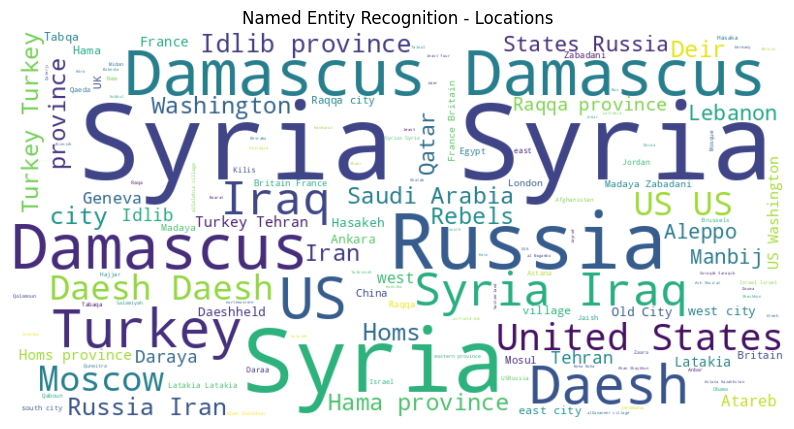

In [63]:
# Create a WordCloud for location entities
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(location_entities))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Named Entity Recognition - Locations')
plt.show()

In [64]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [66]:
fake_news = news[news['labels'] == 0]['article'].str.cat(sep=' ')
real_news = news[news['labels'] == 1]['article'].str.cat(sep=' ')

In [67]:
stop_words = set(stopwords.words('english'))
fake_tokens = word_tokenize(fake_news)
real_tokens = word_tokenize(real_news)
fake_tokens = [word.lower() for word in fake_tokens if word.isalpha() and word.lower() not in stop_words]
real_tokens = [word.lower() for word in real_tokens if word.isalpha() and word.lower() not in stop_words]


In [68]:
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake_tokens))
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(real_tokens))


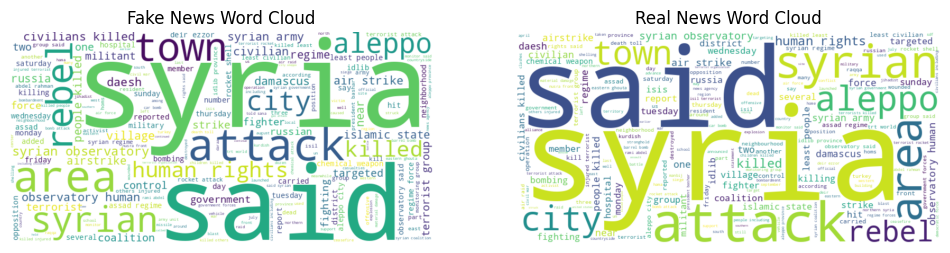

In [70]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')

plt.show()


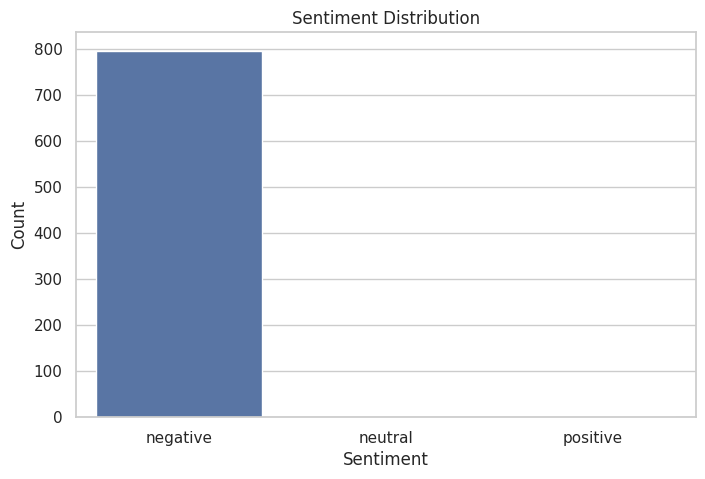

In [74]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x="sentiment", data=news)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

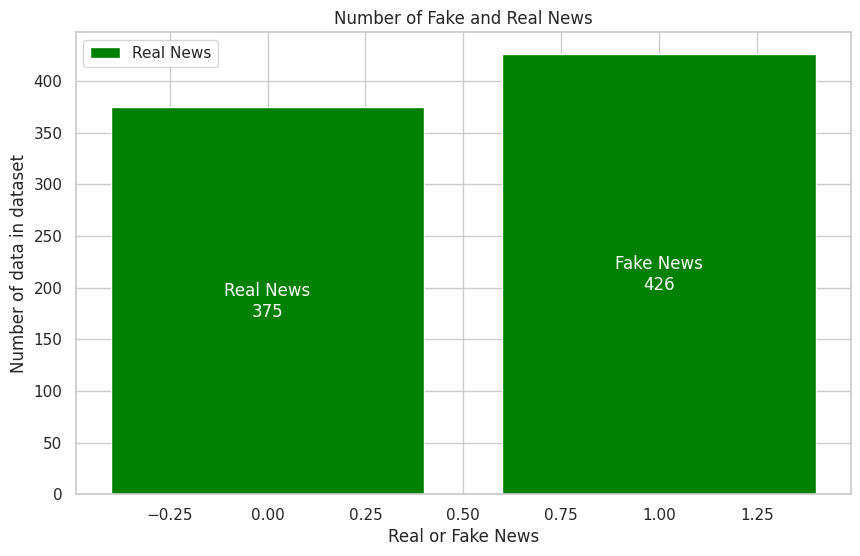

In [78]:
real_count = (news.labels == 0).sum()
fake_count = (news.labels == 1).sum()

plt.figure(figsize=(10, 6))
plt.hist(news.labels, color='green', bins=[-0.5, 0.5, 1.5], rwidth=0.8, align='mid')

plt.text(0, real_count // 2, f'Real News\n{real_count}', ha='center', va='center', color='white', fontsize=12)
plt.text(1, fake_count // 2, f'Fake News\n{fake_count}', ha='center', va='center', color='white', fontsize=12)

plt.ylabel('Number of data in dataset')
plt.xlabel('Real or Fake News')
plt.title('Number of Fake and Real News')

plt.legend(['Real News', 'Fake News'])
plt.show()

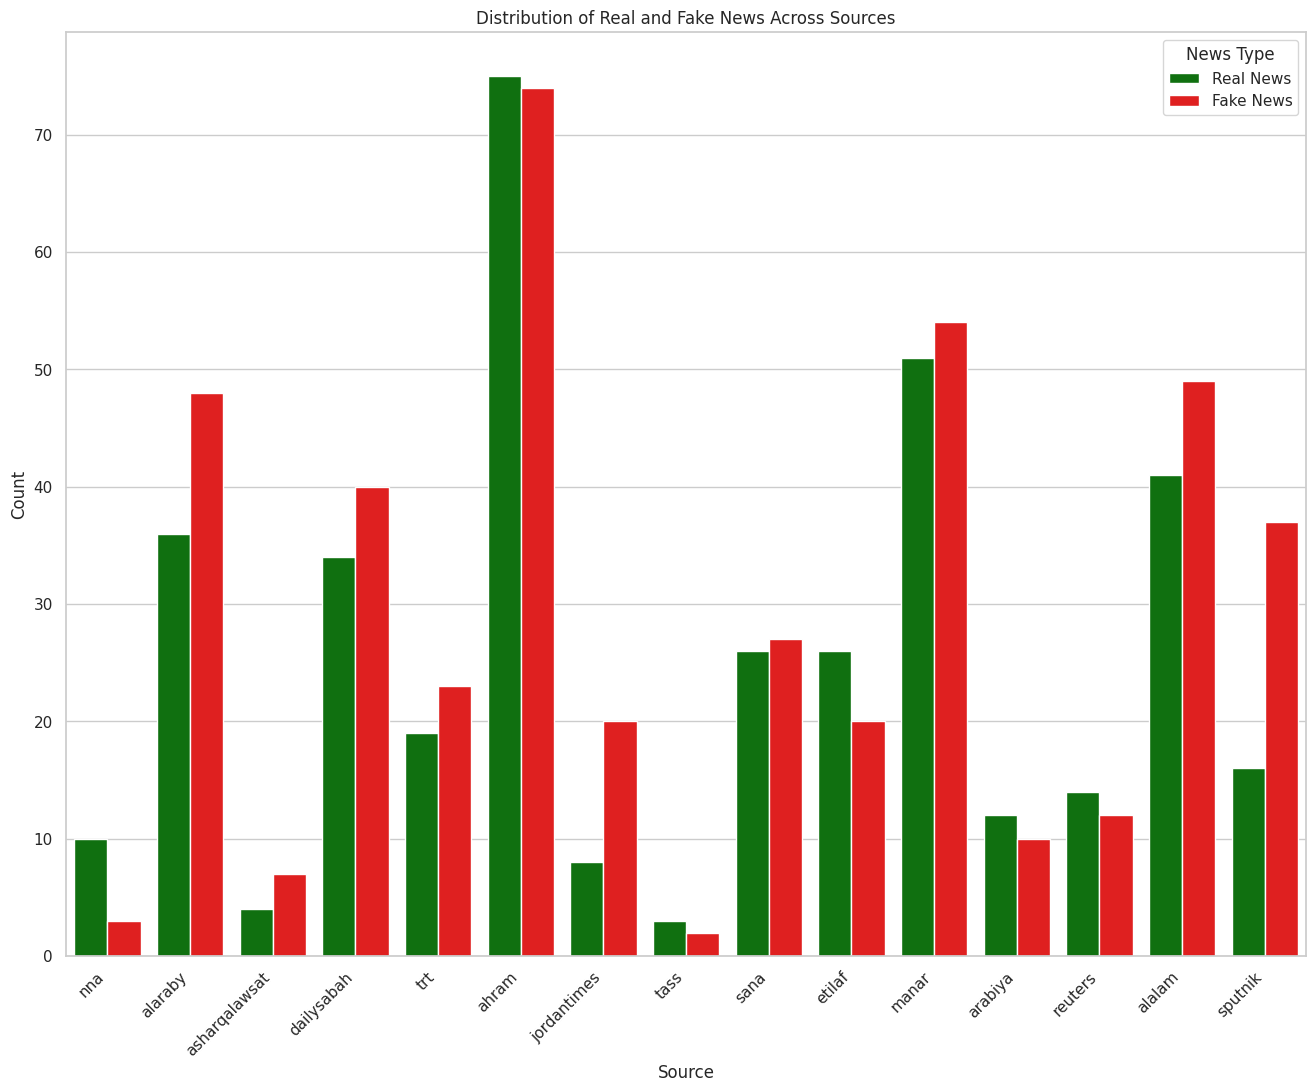

In [81]:
plt.figure(figsize=(16, 12))
palette = {0: 'green', 1: 'red'}
sns.countplot(x='source', hue='labels', data=news, palette=palette)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Distribution of Real and Fake News Across Sources')

plt.legend(['Real News', 'Fake News'], title='News Type')
plt.xticks(rotation=45, ha='right')
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [99]:
X_train, X_test, y_train, y_test = train_test_split(news['cleaned_msg'], news['labels'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer to convert text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_bow, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test_bow)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.546583850931677

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.34      0.39        68
           1       0.59      0.70      0.64        93

    accuracy                           0.55       161
   macro avg       0.52      0.52      0.51       161
weighted avg       0.53      0.55      0.53       161


Confusion Matrix:
 [[23 45]
 [28 65]]


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
from tqdm.notebook import tqdm

In [104]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(news, test_size=0.2, random_state=42)

In [105]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [106]:
# Tokenize and prepare data for BERT
def prepare_data(data, tokenizer):
    input_ids = []
    attention_masks = []

    for sentence in data['cleaned_msg']:
        encoded_data = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        input_ids.append(encoded_data['input_ids'])
        attention_masks.append(encoded_data['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return TensorDataset(input_ids, attention_masks, torch.tensor(data['labels'].values))

In [107]:
# Prepare training and testing data
train_dataset = prepare_data(train_data, tokenizer)
test_dataset = prepare_data(test_data, tokenizer)

In [108]:
# Set up DataLoader for training
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [109]:
# Set up DataLoader for testing
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [110]:
# Set up GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [111]:
# Move the model to GPU
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [112]:
optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [113]:
# Training loop
for epoch in tqdm(range(epochs)):
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, leave=False):
        input_ids, attention_masks, labels = batch
        input_ids, attention_masks, labels = input_ids.to(device), attention_masks.to(device), labels.to(device)

        model.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(train_dataloader)

    print(f'Epoch {epoch + 1}/{epochs} - Average Training Loss: {avg_loss}')


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1/3 - Average Training Loss: 0.715596179664135


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 2/3 - Average Training Loss: 0.723671817779541


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 3/3 - Average Training Loss: 0.7200331494212151


In [114]:
# Testing loop
model.eval()
all_predictions = []
true_labels = []

with torch.no_grad():
    for batch in tqdm(test_dataloader, leave=False):
        input_ids, attention_masks, labels = batch
        input_ids, attention_masks, labels = input_ids.to(device), attention_masks.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

  0%|          | 0/11 [00:00<?, ?it/s]

In [115]:
# Evaluate the model
accuracy = accuracy_score(true_labels, all_predictions)
classification_report_str = classification_report(true_labels, all_predictions)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.422360248447205

Classification Report:
               precision    recall  f1-score   support

           0       0.42      1.00      0.59        68
           1       0.00      0.00      0.00        93

    accuracy                           0.42       161
   macro avg       0.21      0.50      0.30       161
weighted avg       0.18      0.42      0.25       161

